# Set up the environment

You need to install Python, NumPy, Pandas, Matplotlib and Seaborn.

Done and ready to go.

## Imports

In [1]:
import jupyter_black

jupyter_black.load()

In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline

---

## Simple Linear Regression

Regularisation is **not** included.

In [3]:
def simple_train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)

    return w[0], w[1:]

---

## Linear Regression

Regularisation is included and is passed in as a parameter.

In [4]:
def reg_train_linear_regression(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)

    return w[0], w[1:]

---

## Root Mean Squared Error

In [5]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error**2).mean()
    return np.sqrt(mse)

---

## Getting the data 

In this homework, we will use the California Housing Prices from Kaggle. Download it from 
[here](https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv).

You can do it with wget:

In [6]:
!wget "https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv"

--2022-09-16 22:58:25--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1.4M) [text/plain]
Saving to: ‘housing.csv.2’

housing.csv.2       100%[===================>]   1.36M  8.96MB/s    in 0.2s    

2022-09-16 22:58:25 (8.96 MB/s) - ‘housing.csv.2’ saved [1423529/1423529]



---

## EDA

* Look at the data
* Look at the `median_house_value` variable. Does it have a long tail?

Yes the median house value has a somewhat long tail

In [7]:
df_housing = pd.read_csv("housing.csv")

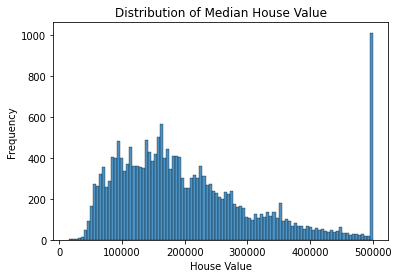

In [8]:
# Look at the distribution of `median_house_value`
sns.histplot(df_housing.median_house_value, bins=100, alpha=0.8)
plt.ylabel("Frequency")
plt.xlabel("House Value")
plt.title("Distribution of Median House Value")
plt.show()

---

## Features

For the rest of the homework, you'll need to use only these columns:

* `latitude`
* `longitude`
* `housing_median_age`
* `total_rooms`
* `total_bedrooms`
* `population`
* `households`
* `median_income`
* `median_house_value`

Select only them.

The simplest way to do this is to delete the `ocean_proximity` column.

In [9]:
df = df_housing.copy()
df = df.drop("ocean_proximity", axis=1)

---

## Question 1

Find a feature with missing values. How many missing values does it have?

* **207**
* 307
* 408
* 508

In [10]:
# Find a feature with missing values.
# How many missing values does it have?
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

---

## Question 2

What's the median (50% percentile) for variable 'population'?

* 1133
* 1122
* **1166**
* 1188

In [11]:
# What's the median (50% percentile) for variable 'population'?
# We can get this using describe and taking the 50% percentile
df.population.describe()

count    20640.000000
mean      1425.476744
std       1132.462122
min          3.000000
25%        787.000000
50%       1166.000000
75%       1725.000000
max      35682.000000
Name: population, dtype: float64

---

## Split the data

* Shuffle the initial dataset, use seed 42.
* Split your data in train/val/test sets, with 60%/20%/20% distribution.
* Make sure that the target value ('median_house_value') is not in your dataframe.
* Apply the log transformation to the median_house_value variable using the np.log1p() function.

In [12]:
# Shuffle the initial dataset, use seed 42.
np.random.seed(42)

n = len(df)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

In [13]:
# Split your data in train/val/test sets, with 60%/20%/20% distribution
df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train : n_train + n_val].copy()
df_test = df_shuffled.iloc[n_train + n_val :].copy()

In [14]:
# Make sure that the target value ('median_house_value') is not in your dataframe
y_train_orig = df_train.median_house_value.values
y_val_orig = df_val.median_house_value.values
y_test_orig = df_test.median_house_value.values

del df_train["median_house_value"]
del df_val["median_house_value"]
del df_test["median_house_value"]

In [15]:
# Apply the log transformation to the median_house_value variable using the np.log1p() function
y_train = np.log1p(y_train_orig)
y_val = np.log1p(y_val_orig)
y_test = np.log1p(y_test_orig)

---

## Question 3

* We need to deal with missing values for the column from Q1.
* We have two options: fill it with 0 or with the mean of this variable.
* Try both options. For each, train a linear regression model without regularization using the code from the lessons.
* For computing the mean, use the training only!
* Use the validation dataset to evaluate the models and compare the RMSE of each option.
* Round the RMSE scores to 2 decimal digits using round(score, 2)
* Which option gives better RMSE?

Options:

* With 0
* With mean
* With median
* **Both are equally good**

In [16]:
# Remind ourselves about the missing data
df_train.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
dtype: int64

In [17]:
# Calculate mean of total_bedrooms
total_bedrooms_mean = df_train.total_bedrooms.mean()
total_bedrooms_mean

533.4803317730147

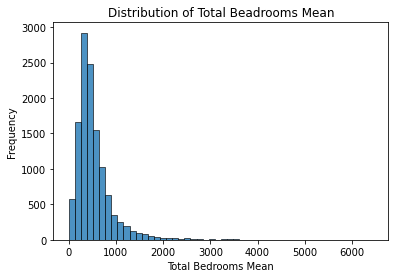

In [18]:
# Look at the distribution of `total_bedrooms_mean`
sns.histplot(df_train.total_bedrooms, bins=50, alpha=0.8)
plt.ylabel("Frequency")
plt.xlabel("Total Bedrooms Mean")
plt.title("Distribution of Total Beadrooms Mean")
plt.show()

In [19]:
# We have two options: fill it with 0 or with the mean of total_bedrooms.
# Try both options.
# For each, train a linear regression model without regularization using the code from the lessons.

for num_beds in [0, total_bedrooms_mean]:
    print(f"Filling missing values with: {num_beds}")
    X_train = df_train.fillna(num_beds).copy()

    # Calculate bias and weights
    w_0, w = simple_train_linear_regression(X_train, y_train)

    # Predict values of training data
    y_train_pred = w_0 + X_train.dot(w)
    training_rmse = rmse(y_train, y_train_pred)
    print(f"Training RMSE: {round(training_rmse, 2)}")

    # Predict values of validation data
    X_val = df_val.copy()
    y_val_pred = w_0 + X_val.dot(w)
    validation_rmse = rmse(y_val, y_val_pred)
    print(f"Validation RMSE: {round(validation_rmse, 2)}")

    print(f"Training:   {training_rmse}")
    print(f"Validation: {validation_rmse}")
    print()

Filling missing values with: 0
Training RMSE: 0.34
Validation RMSE: 0.33
Training:   0.34131359101566755
Validation: 0.3295330365229767

Filling missing values with: 533.4803317730147
Training RMSE: 0.34
Validation RMSE: 0.33
Training:   0.34104161810328065
Validation: 0.32901954390020777



### Plot Predicted vs Expected

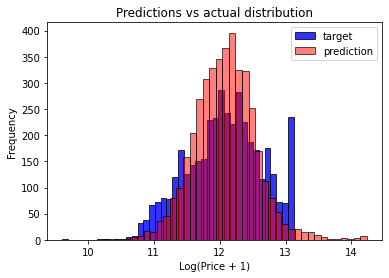

In [20]:
plt.figure(figsize=(6, 4))

sns.histplot(y_val, label="target", color="blue", alpha=0.8, bins=40)
sns.histplot(y_val_pred, label="prediction", color="red", alpha=0.5, bins=40)

plt.legend()

plt.ylabel("Frequency")
plt.xlabel("Log(Price + 1)")
plt.title("Predictions vs actual distribution")

plt.show()

---

## Question 4

* Now let's train a regularized linear regression.
* For this question, fill the NAs with 0.
* Try different values of r from this list: [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10].
* Use RMSE to evaluate the model on the validation dataset.
* Round the RMSE scores to 2 decimal digits.
* Which r gives the best RMSE?

If there are multiple options, select the smallest r.

Options:

* **0**
* 0.000001
* 0.001
* 0.0001

In [32]:
# For this question, fill the NAs with 0.
X_train = df_train.fillna(0).copy()

# Try different values of r from this list: [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w_0, w = reg_train_linear_regression(X_train, y_train, r=r)

    # Use RMSE to evaluate the model on the validation dataset
    # Round the RMSE scores to 2 decimal digits
    X_val = df_val.copy()
    y_val_pred = w_0 + X_val.dot(w)
    print(f"{r:6}: RMSE:{round(rmse(y_val, y_val_pred), 2)}")

     0: RMSE:0.33
 1e-06: RMSE:0.33
0.0001: RMSE:0.33
 0.001: RMSE:0.33
  0.01: RMSE:0.33
   0.1: RMSE:0.33
     1: RMSE:0.33
     5: RMSE:0.34
    10: RMSE:0.34


---

## Question 5

* We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
* Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
* For each seed, do the train/validation/test split with 60%/20%/20% distribution.
* Fill the missing values with 0 and train a model without regularization.
* For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
* What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
* Round the result to 3 decimal digits (round(std, 3))

> Note: Standard deviation shows how different the values are. If it's low, then all values are approximately the same. If it's high, the values are different. If standard deviation of scores is low, then our model is stable.

Options:

* 0.16
* 0.00005
* **0.005**
* 0.15555


In [43]:
# Function to prepare the data and split into three data sets
# Returns:
#   - X_train
#   - y_train
#   - X_val
#   - y_val
#   - X_test
#   - y_test


def prepare_data(df, seed):

    # Shuffle the initial dataset, use seed value passed to function
    np.random.seed(seed)

    # The length of the data frame
    n = len(df)

    # The slice points on which to split the data frame
    n_val = int(0.2 * n)
    n_test = int(0.2 * n)
    n_train = n - (n_val + n_test)

    # Shuffle the rows in the original dataframe
    idx = np.arange(n)
    np.random.shuffle(idx)
    df_shuffled = df.iloc[idx]

    # Fillna values with zero
    df_shuffled = df_shuffled.fillna(0)

    # Split the data in train /val /test sets
    X_train = df_shuffled.iloc[:n_train].copy()
    X_val = df_shuffled.iloc[n_train : n_train + n_val].copy()
    X_test = df_shuffled.iloc[n_train + n_val :].copy()

    # Get the target values and get the log values
    y_train = np.log1p(X_train.median_house_value.values)
    y_val = np.log1p(X_val.median_house_value.values)
    y_test = np.log1p(X_test.median_house_value.values)

    # Delete target values from train / val / test dataframes
    del X_train["median_house_value"]
    del X_val["median_house_value"]
    del X_test["median_house_value"]

    # Return data
    return X_train, y_train, X_val, y_val, X_test, y_test

In [44]:
# Function to run regression and return RSME
def run_regression(X_train, y_train, X_val, y_val):

    w_0, w = simple_train_linear_regression(X_train, y_train)

    # Use RMSE to evaluate the model on the validation dataset
    # Round the RMSE scores to 2 decimal digits
    y_pred = w_0 + X_val.dot(w)

    # Return the RMSE
    return rmse(y_val, y_val_pred)

In [51]:
# Run regression using different seeds for the data:

# Get a clean dataframe to be sure
df = df_housing.copy()
df = df.drop("ocean_proximity", axis=1)

results = []

for seed in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    X_train, y_train, X_val, y_val, X_test, y_test = prepare_data(df, seed)
    results.append(run_regression(X_train, y_train, X_val, y_val))

print(round(np.std(results), 3))

0.006


---

## Question 6

* Split the dataset like previously, use seed 9.
* Combine train and validation datasets.
* Fill the missing values with 0 and train a model with r=0.001.
* What's the RMSE on the test dataset?

Options:

* **0.35**
* 0.135
* 0.450
* 0.245

In [59]:
# Run regression using a seed of 9:

# Get a clean dataframe to be sure
df = df_housing.copy()
df = df.drop("ocean_proximity", axis=1)

# Split the data
X_train, y_train, X_val, y_val, X_test, y_test = prepare_data(df, 9)

# Concat the Train and Validation Datasets
X_full = pd.concat([X_train, X_val]).reset_index(drop=True)
y_full = np.concatenate([y_train, y_val])

# Train the model
w_0, w = reg_train_linear_regression(X_full, y_full, r=0.001)

# Use RMSE to evaluate the model on the test dataset
# Round the RMSE scores to 2 decimal digits
y_pred = w_0 + X_test.dot(w)
print(f"RMSE:{round(rmse(y_test, y_pred), 2)}")

RMSE:0.35


---

# Learning in Public

* https://twitter.com/David__Colton/status/1568001566447214598?s=20&t=_4sm6TuFdV_36eOMBK-JbQ
* https://twitter.com/David__Colton/status/1568004499058429956?s=20&t=_4sm6TuFdV_36eOMBK-JbQ
* https://twitter.com/David__Colton/status/1568324277660749827?s=20&t=_4sm6TuFdV_36eOMBK-JbQ
* https://twitter.com/David__Colton/status/1568330907647451137?s=20&t=wQSMBOvJoajJIMJSAFa5aw
* https://twitter.com/David__Colton/status/1568375377676103680?s=20&t=3QgmIOgtc5fgSXZorfb_JQ
* https://twitter.com/David__Colton/status/1568531366500868097?s=20&t=5VaR7HFlXpylItsdZZPLAA
* https://twitter.com/David__Colton/status/1569248468493008896?s=20&t=aJ7xfPxFu4kLB8UDB2AYkw
* https://twitter.com/David__Colton/status/1569407694049579015?s=20&t=13UXGegjPM1G90-CtyAXXQ
* https://twitter.com/David__Colton/status/1569424652363079682?s=20&t=IV2qUMfVtfbqbV86ZOjZog
* https://twitter.com/David__Colton/status/1569454639212367872?s=20&t=dd5431V5jxmtiso8NVtnNA
* https://twitter.com/David__Colton/status/1569799846776930304?s=20&t=BrJGQBz0f-SeSAjfxkCucQ
* https://twitter.com/David__Colton/status/1569805732043800578?s=20&t=_W3J_xAAh29ss02s1gIxIA
* https://twitter.com/David__Colton/status/1570116960570023936?s=20&t=BzSnj_1Cf13hPryPrXZewQ
* https://twitter.com/David__Colton/status/1570118696319737856?s=20&t=2DOUfGaiFMedfPVL5TQMHg
* https://twitter.com/David__Colton/status/1570495078619295746?s=20&t=Dak6OP2ca7n690EN_G562Q
* https://twitter.com/David__Colton/status/1570532176080539648?s=20&t=EFDqXgccXXeDiVPQ59sZdw